## WEBSITE PHISHING DETECTION MACHINE LEARNING MODEL

## IMPORTING THE REQUIRED LIBRARIES AND LOADING THE DATASET

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings

warnings.filterwarnings('ignore')

In [2]:
# load the dataset
phishing_data = pd.read_csv(r'C:\Users\Khushi\OneDrive\Desktop\phising dataset\dataset2.csv')

## Data Processing

In [3]:
# Display first few rows and columns of the dataset
print(phishing_data.head(10))

   url_length  n_dots  n_hypens  n_underline  n_slash  n_questionmark  \
0          37       3         0            0        0               0   
1          77       1         0            0        0               0   
2         126       4         1            2        0               1   
3          18       2         0            0        0               0   
4          55       2         2            0        0               0   
5          32       3         1            0        0               0   
6          19       2         0            0        0               0   
7          81       2         0            0        0               0   
8          42       2         0            0        0               0   
9         104       1        10            0        0               0   

   n_equal  n_at  n_and  n_exclamation  n_space  n_tilde  n_comma  n_plus  \
0        0     0      0              0        0        0        0       0   
1        0     0      0              0    

In [4]:
print(phishing_data.columns)

Index(['url_length', 'n_dots', 'n_hypens', 'n_underline', 'n_slash',
       'n_questionmark', 'n_equal', 'n_at', 'n_and', 'n_exclamation',
       'n_space', 'n_tilde', 'n_comma', 'n_plus', 'n_asterisk', 'n_hastag',
       'n_dollar', 'n_percent', 'n_redirection', 'phishing'],
      dtype='object')


In [5]:
print(phishing_data.tail())

        url_length  n_dots  n_hypens  n_underline  n_slash  n_questionmark  \
100072          23       3         1            0        0               0   
100073          34       2         0            0        0               0   
100074          70       2         1            0        5               0   
100075          28       2         0            0        1               0   
100076          16       2         0            0        0               0   

        n_equal  n_at  n_and  n_exclamation  n_space  n_tilde  n_comma  \
100072        0     0      0              0        0        0        0   
100073        0     0      0              0        0        0        0   
100074        0     0      0              0        0        0        0   
100075        0     0      0              0        0        0        0   
100076        0     0      0              0        0        0        0   

        n_plus  n_asterisk  n_hastag  n_dollar  n_percent  n_redirection  \
100072    

In [6]:
# Check for duplicate rows and remove them

phishing_data = phishing_data.drop_duplicates()
phishing_data

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100033,113,2,13,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
100042,63,3,0,0,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
100044,78,4,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
100045,113,4,2,0,6,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1


In [7]:
# Dataframe Information
print(phishing_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21891 entries, 0 to 100051
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   url_length      21891 non-null  int64
 1   n_dots          21891 non-null  int64
 2   n_hypens        21891 non-null  int64
 3   n_underline     21891 non-null  int64
 4   n_slash         21891 non-null  int64
 5   n_questionmark  21891 non-null  int64
 6   n_equal         21891 non-null  int64
 7   n_at            21891 non-null  int64
 8   n_and           21891 non-null  int64
 9   n_exclamation   21891 non-null  int64
 10  n_space         21891 non-null  int64
 11  n_tilde         21891 non-null  int64
 12  n_comma         21891 non-null  int64
 13  n_plus          21891 non-null  int64
 14  n_asterisk      21891 non-null  int64
 15  n_hastag        21891 non-null  int64
 16  n_dollar        21891 non-null  int64
 17  n_percent       21891 non-null  int64
 18  n_redirection   21891 non-null

In [8]:
# Display summary statistics
print(phishing_data.describe(include='all'))

         url_length        n_dots      n_hypens   n_underline       n_slash  \
count  21891.000000  21891.000000  21891.000000  21891.000000  21891.000000   
mean      78.476086      2.894066      1.308072      0.482481      2.569184   
std       77.361414      2.161135      2.351815      1.385397      2.451018   
min        4.000000      1.000000      0.000000      0.000000      0.000000   
25%       41.000000      2.000000      0.000000      0.000000      0.000000   
50%       61.000000      2.000000      1.000000      0.000000      2.000000   
75%       88.000000      3.000000      2.000000      0.000000      4.000000   
max     4165.000000     24.000000     43.000000     21.000000     44.000000   

       n_questionmark       n_equal          n_at         n_and  \
count    21891.000000  21891.000000  21891.000000  21891.000000   
mean         0.083642      0.710886      0.083824      0.492074   
std          0.304815      1.720661      0.554197      1.741748   
min          0.00000

In [9]:
print(phishing_data.isnull().sum())

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64


In [10]:
phishing_data['phishing'].value_counts().head(50)

phishing
1    15872
0     6019
Name: count, dtype: int64

## Data Visualization

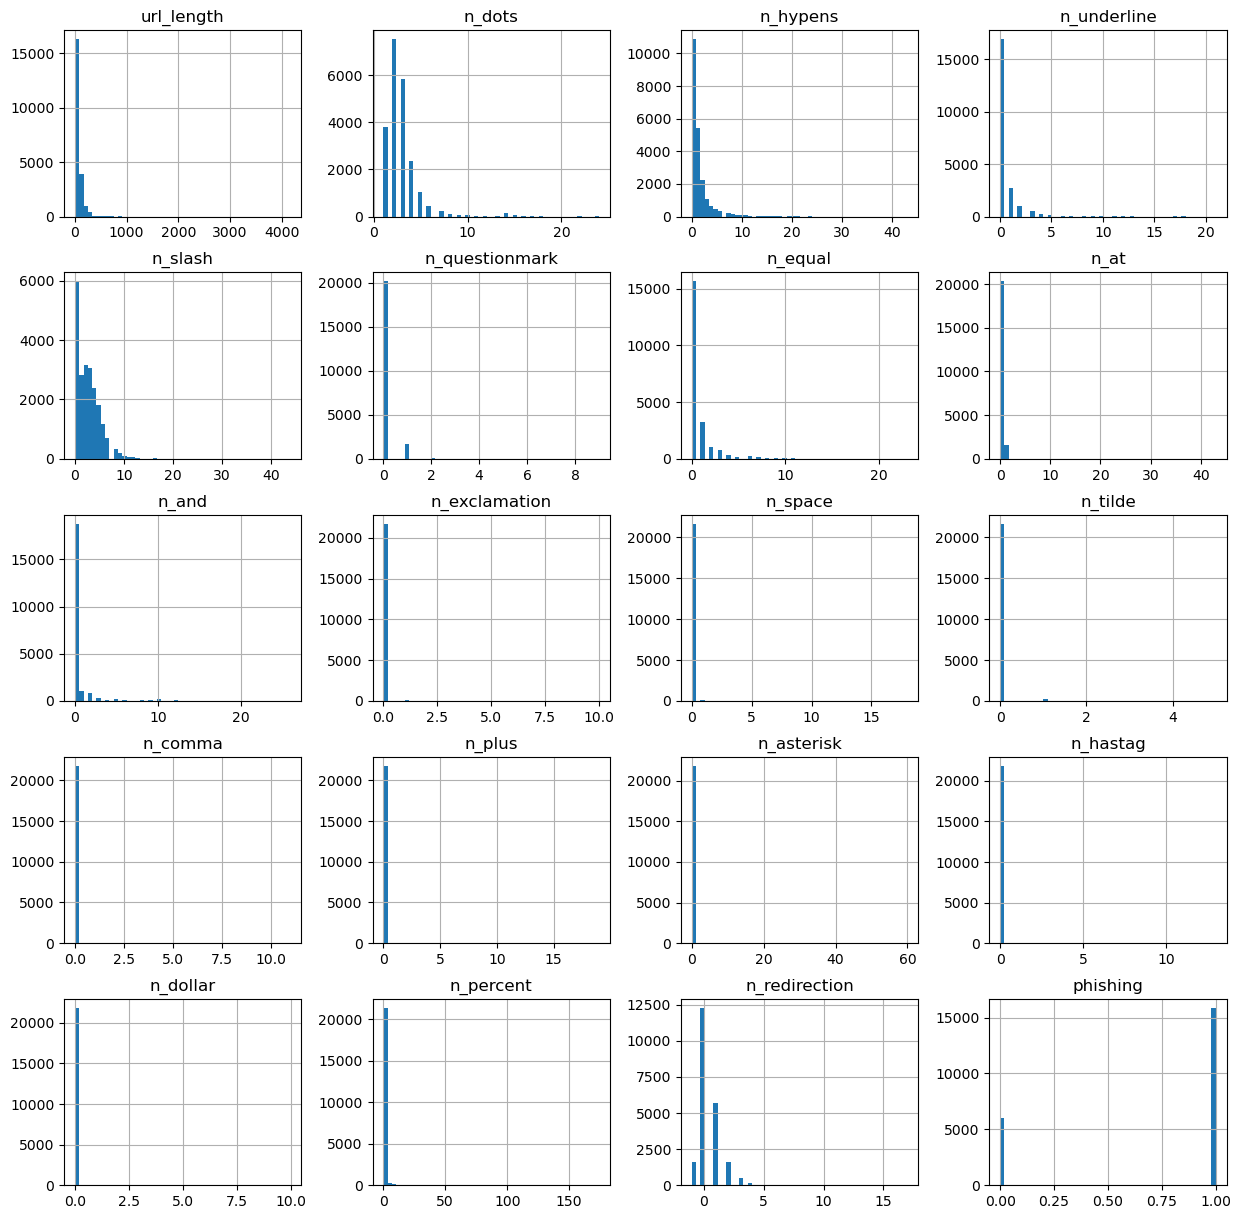

In [11]:
# Plotting a histogram
%matplotlib inline
import matplotlib.pyplot as plt
phishing_data.hist(bins=50,figsize=(15,15))
plt.show()

## SPLITTING THE DATA

In [12]:
# 1. Training Data       
# 2. Testing Data

In [13]:
# import modules
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
# read the dataset
df = pd.read_csv(r'C:\Users\Khushi\OneDrive\Desktop\phising dataset\dataset2.csv')
 
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12)


In [14]:
X_train

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection
69445,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
81145,32,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45811,30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
33930,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20031,16,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75011,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
36482,12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
40177,25,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19709,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
X_test

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection
46175,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19349,154,7,0,0,5,0,2,0,4,0,0,0,0,0,0,0,0,1,0
98887,12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
44261,17,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7359,71,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97158,61,3,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16758,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14769,33,1,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76251,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
len(X_train) , len(X_test)

(80061, 20016)

## Looking for Correlations

In [17]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode 'status' column
label_encoder = LabelEncoder()
phishing_data['phishing'] = label_encoder.fit_transform(phishing_data['phishing'])

# Now, calculate the correlation
correlation_matrix = phishing_data.corr()
print(correlation_matrix)

                url_length    n_dots  n_hypens  n_underline   n_slash  \
url_length        1.000000  0.408980  0.291834     0.345670  0.230738   
n_dots            0.408980  1.000000 -0.025603     0.098702  0.108071   
n_hypens          0.291834 -0.025603  1.000000     0.078814  0.009228   
n_underline       0.345670  0.098702  0.078814     1.000000  0.071307   
n_slash           0.230738  0.108071  0.009228     0.071307  1.000000   
n_questionmark    0.294768  0.350276 -0.008927     0.090933 -0.089835   
n_equal           0.565676  0.514283  0.041654     0.266889  0.111000   
n_at              0.128160  0.145223 -0.020901     0.019852  0.040040   
n_and             0.531958  0.583710  0.035659     0.208416  0.083229   
n_exclamation     0.038359 -0.007539 -0.008046     0.045247  0.006659   
n_space           0.041206 -0.000214  0.009743    -0.004433 -0.055343   
n_tilde           0.093517 -0.003813 -0.020555     0.021174  0.038827   
n_comma           0.054802  0.036393  0.004765     

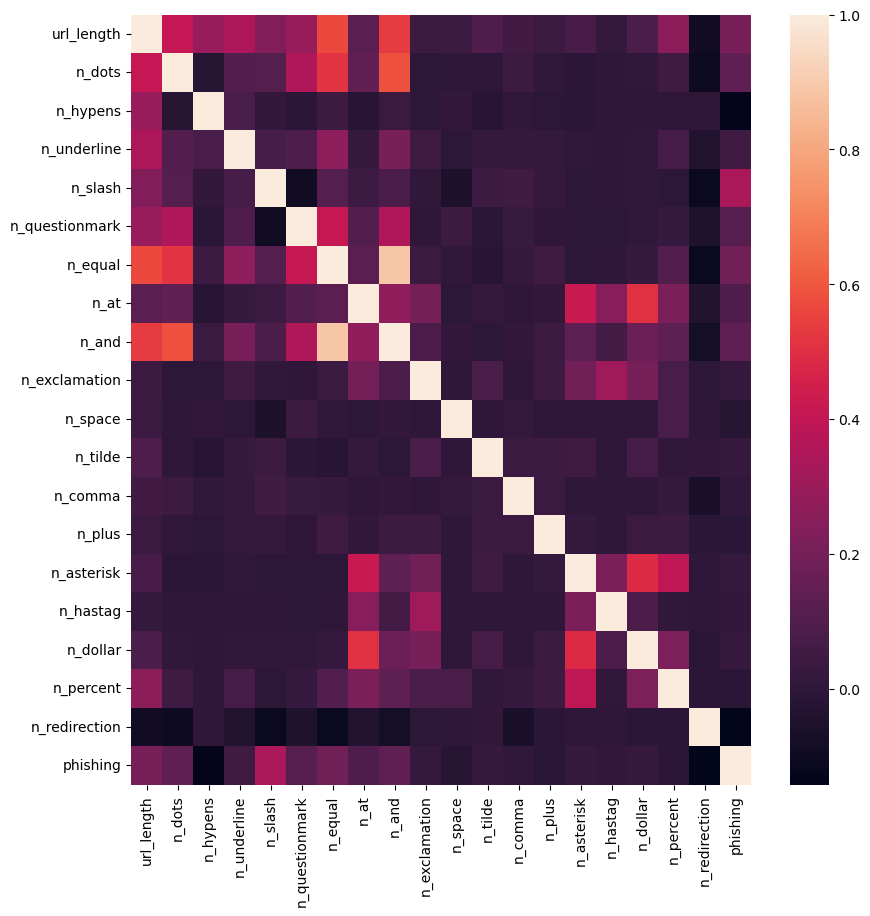

In [18]:
# CORRELATION HEATMAP

plt.figure(figsize=(10,10))
sns.heatmap(phishing_data.corr())
plt.show()

## Training Models

## DECISION TREE CLASSIFIER

In [19]:
# Import Required Librarie
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Define the feature matrix (X) and the target variable (y)
X = phishing_data.drop(columns=['phishing'])  
y = phishing_data['phishing']  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train the Decision Tree Model

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [22]:
# Check the Model Performance

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.70


In [23]:
#predicting the target value from the model for the samples
y_test_tree = model.predict(X_test)
y_train_tree = model.predict(X_train)
     
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
     

Decision Tree: Accuracy on training Data: 0.931
Decision Tree: Accuracy on test Data: 0.703


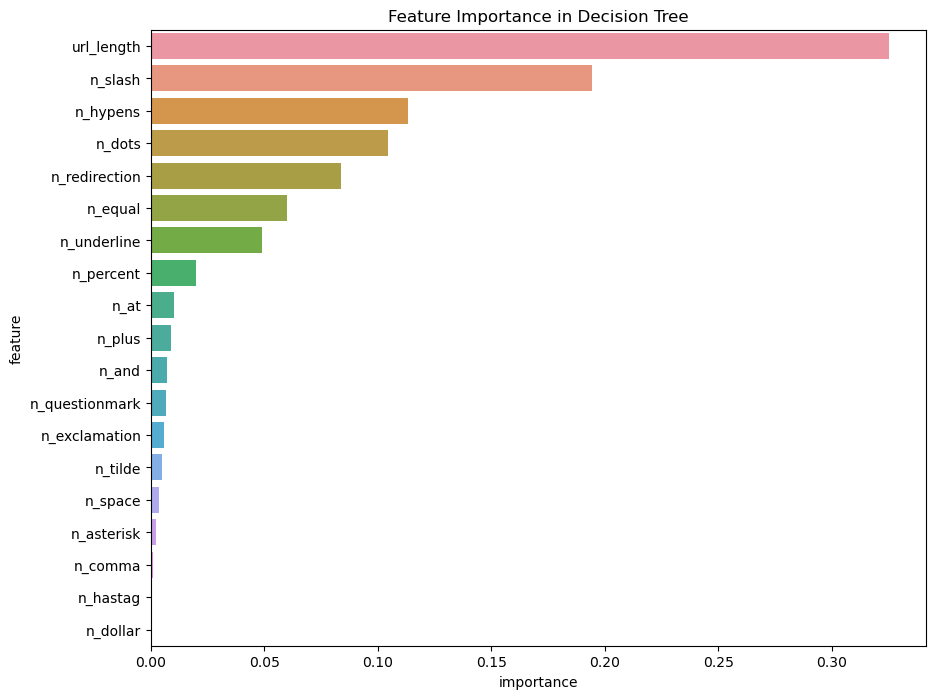

In [24]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})
# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_df['importance'], y=feature_importance_df['feature'])
plt.title('Feature Importance in Decision Tree')
plt.show()



## RANDOM FOREST CLASSIFIER

In [25]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [26]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [27]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.784
Random forest: Accuracy on test Data: 0.777


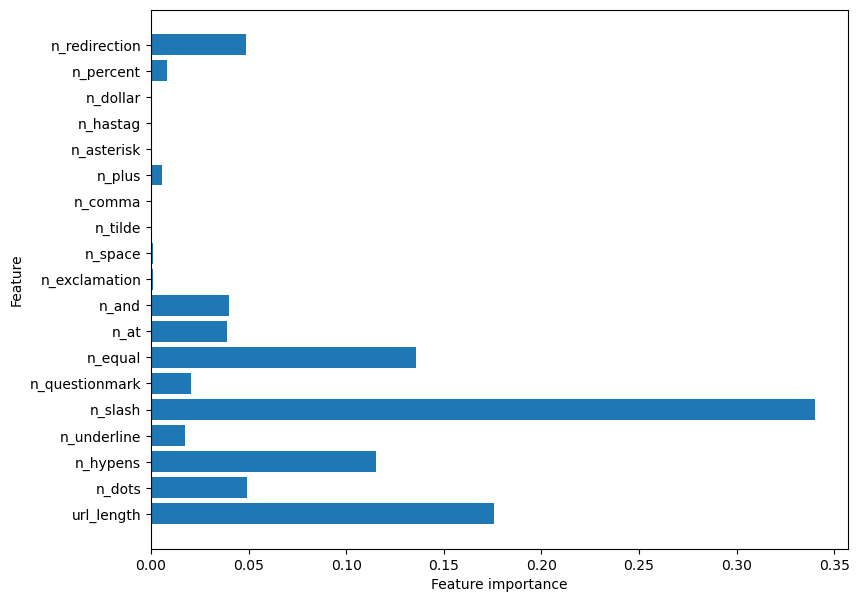

In [28]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [29]:
# Create a global list to store results
results = []

def storeResults(model_name, acc_train, acc_test):
    # Check if the model name already exists in the results
    for result in results:
        if result['model_name'] == model_name:
            print(f"Results for {model_name} already stored. Skipping to avoid duplication.")
            return
    
    # If not, store the results
    result_entry = {
        'model_name': model_name,
        'acc_train': acc_train,
        'acc_test': acc_test
    }
    results.append(result_entry)
    print(f"Results stored for {model_name}.")
acc_train_forest = 0.792 
acc_test_forest = 0.783  

# Store the results
storeResults('Random Forest', acc_train_forest, acc_test_forest)

Results stored for Random Forest.


## XGBoost CLASSIFICATION MODEL

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [33]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.868
XGBoost : Accuracy on test Data: 0.807


In [34]:
#storing the results
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

Results stored for XGBoost.


## SCALAR VECTOR MACHINE (SVM) 

In [35]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [36]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [37]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.777
SVM : Accuracy on test Data: 0.774


In [38]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

Results stored for SVM.


## COMPARISON OF MODELS

In [39]:
#importing packages
from sklearn.metrics import accuracy_score

In [40]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

In [46]:
# Define the list of model names
ML_Model = [ 'Random Forest','XGBoost Model','Scalar Vector Machine', 'Decision Tree']

# Make a list the accuracy corresponding to training data
acc_train = [ 0.78,0.86, 0.77,0.93]  

#Make a list the accuracy corresponding to testing data 
acc_test = [ 0.77,0.80, 0.77,0.70] 

In [47]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Random Forest,0.78,0.77
1,XGBoost Model,0.86,0.80
2,Scalar Vector Machine,0.77,0.77
3,Decision Tree,0.93,0.70


In [48]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,XGBoost Model,0.86,0.80
0,Random Forest,0.78,0.77
2,Scalar Vector Machine,0.77,0.77
3,Decision Tree,0.93,0.70


In [44]:
# The accuracy is higher for XGBoost model.

# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [45]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)